In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import sys
sys.path.append('..')

from indra.recipes import parabolic_commutator
from indra.plotting.limit import dfs

In [3]:
gens = parabolic_commutator(1.887 + 0.05j, 2)

<IPython.core.display.Javascript object>


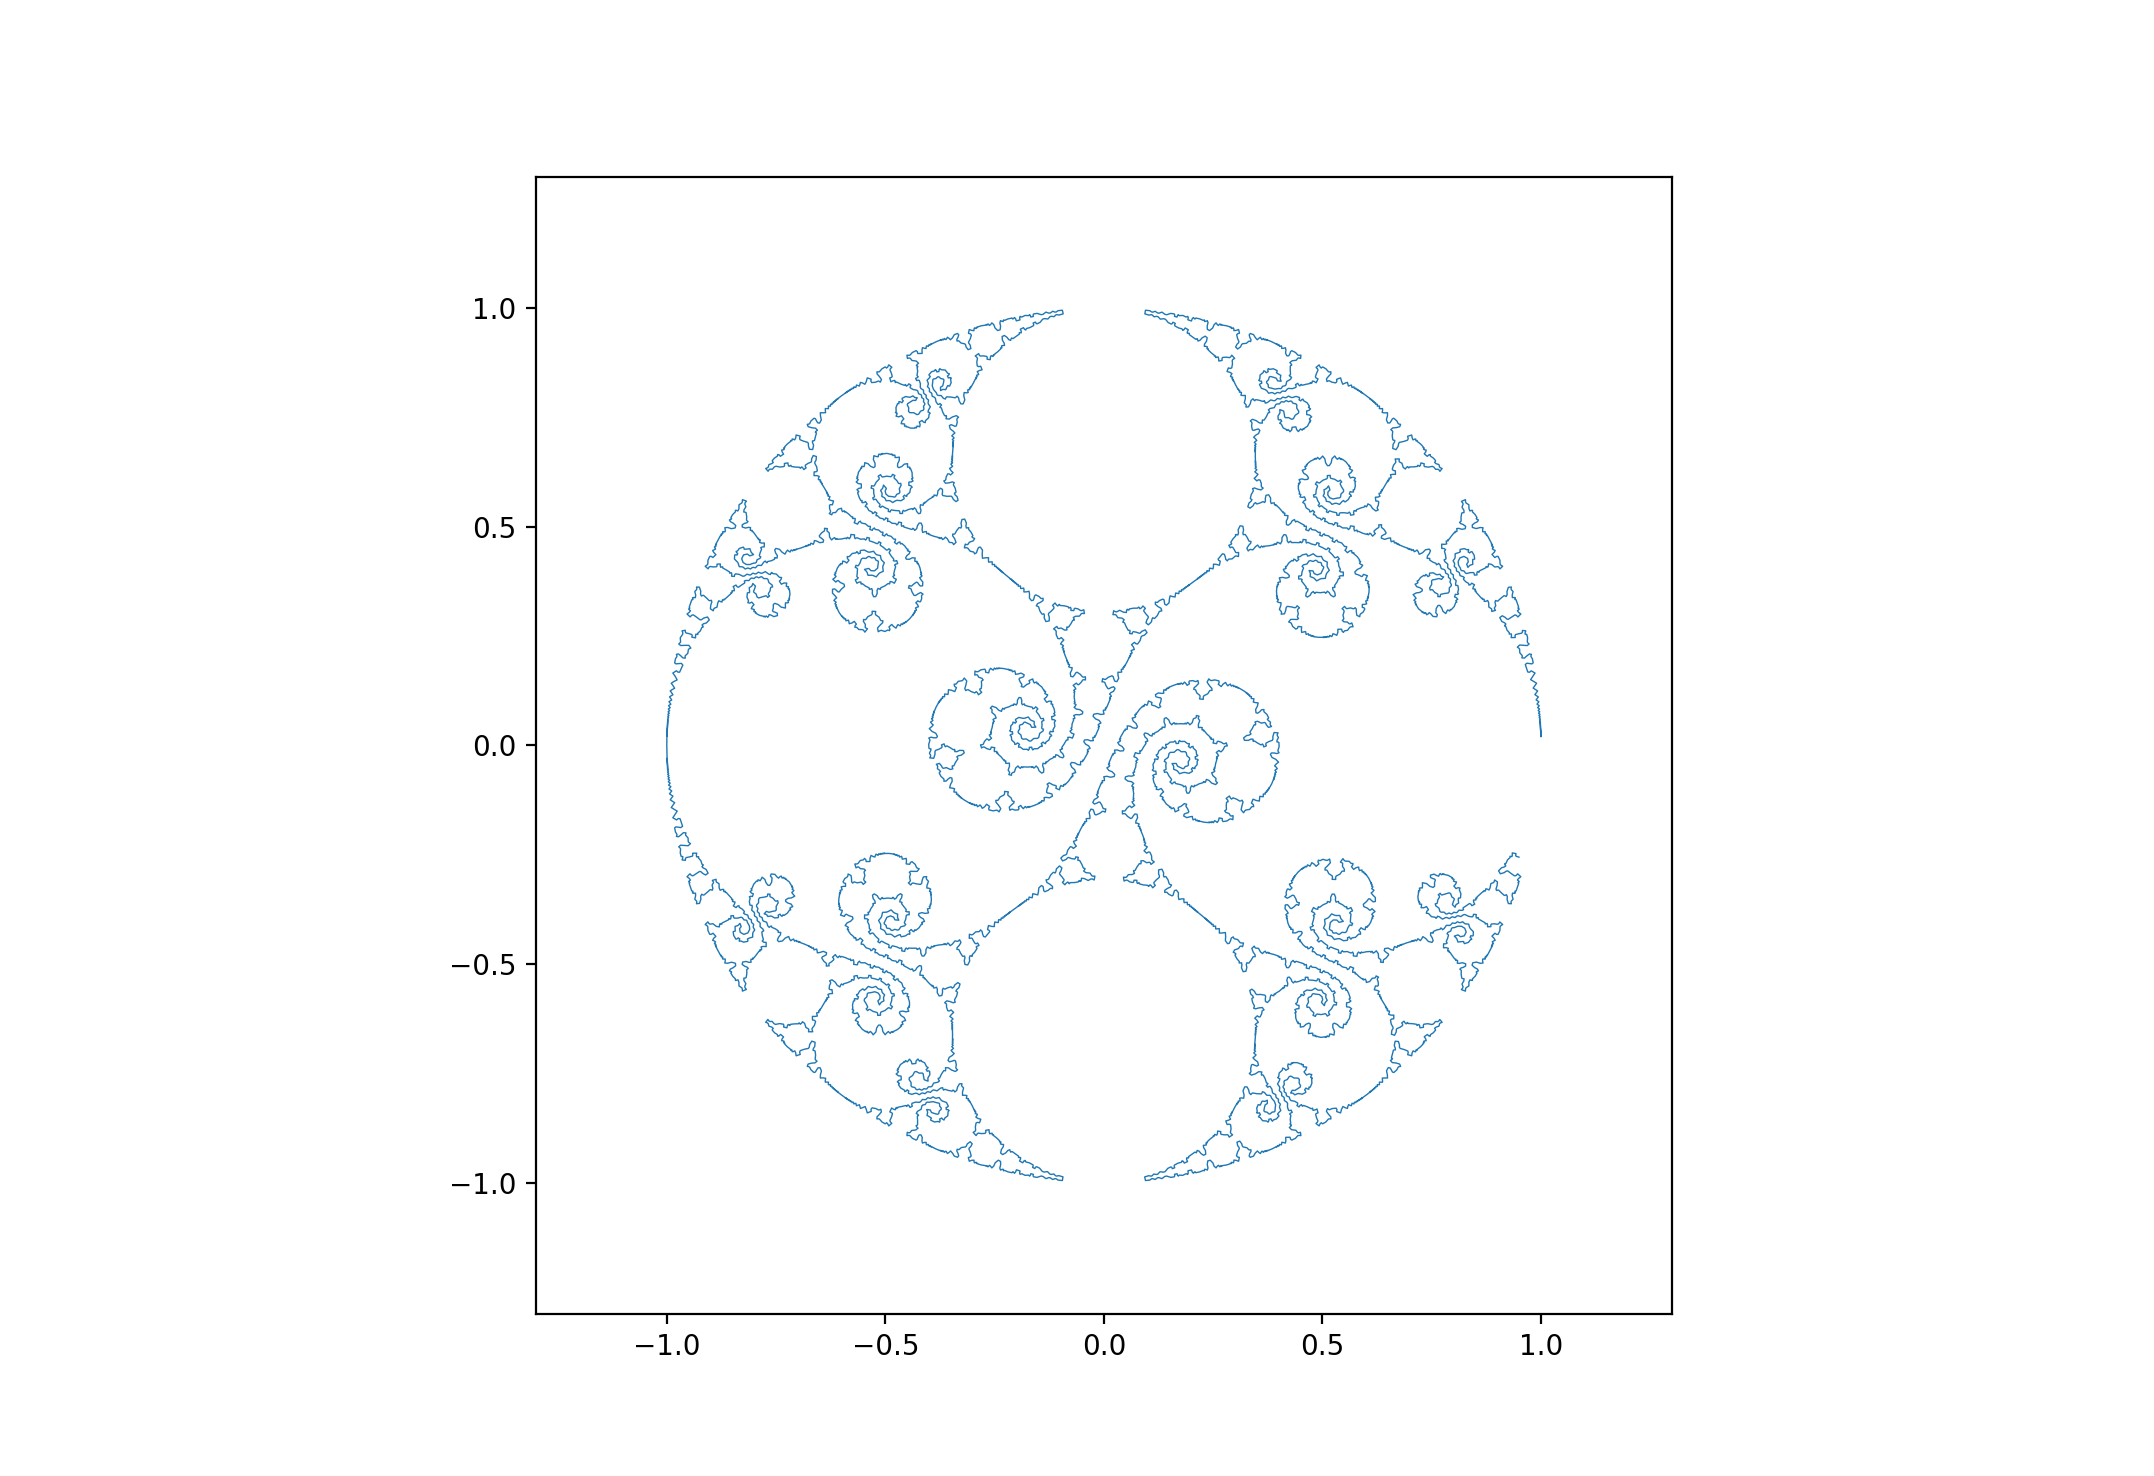

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((-1.3, 1.3))
ax.set_ylim((-1.3, 1.3))

pts = list(dfs(gens, max_level=100, eps=1e-2))

xs = [x.real for x in pts] + [pts[0].real]
ys = [x.imag for x in pts] + [pts[0].imag]

n_frames = len(xs)

line, = ax.plot([], [], linewidth=0.5)


def init():  # only required for blitting to give a clean slate.
    line.set_data([], [])
    return line,


def animate(i):
    line.set_data(xs[:i], ys[:i])
    return line,


ani = animation.FuncAnimation(
    fig, animate,
    init_func=init,
    frames=n_frames,
    interval=2,
    blit=True,
)

# requires ffmpeg
# ani.save("movie.mp4")

plt.show()